DATA FORMATTING LIBRARIES

In [114]:
import pandas as pd
import numpy as np
import seaborn as sb

PREPROCESSING LIBRARIES

In [115]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay

CLASSIFICATION ALGORITHM LIBRARIES

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

DATA CONVERSION TO TRAIN-TEST-SPLIT

In [117]:
raw_data = pd.read_csv("pd_vocal_data.csv")
data = pd.DataFrame(data = raw_data)
print(data.columns)

from sklearn.model_selection import train_test_split

X = data[["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)",
       "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP",
       "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5",
       "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "RPDE", "DFA",
       "spread1", "spread2", "D2", "PPE"]]
y = np.array(data[["status"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


CLASSIFIER PARAMETERS

In [118]:
rfClassifier = RandomForestClassifier(n_estimators = 70, random_state = 101)
svcClassifier = make_pipeline(StandardScaler(), SVC())

RANDOM FOREST CONTROL TEST

0.9600000000000001


<AxesSubplot:title={'center':'Random Forest Control Group  Matrix'}>

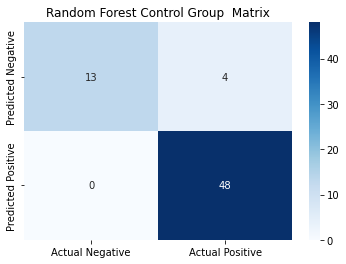

In [119]:
rfClassifier.fit(X_train, y_train.ravel())
rf_control_predictions = rfClassifier.predict(X_test)
print(f1_score(y_test, rf_control_predictions))

rf_confusion_matrix = confusion_matrix(y_pred = rf_control_predictions,y_true= y_test, labels=rfClassifier.classes_)

ax=plt.axes()
ax.set_title("Random Forest Control Group  Matrix")
sb.heatmap(rf_confusion_matrix, cmap= 'Blues', annot=True, xticklabels=['Actual Negative', 'Actual Positive'], yticklabels=['Predicted Negative', 'Predicted Positive'], ax= ax)

SUPPORT VECTOR MACHINE CONTROL TEST

0.923076923076923


<AxesSubplot:title={'center':'Support Vector Machine Control Group Confusion Matrix'}>

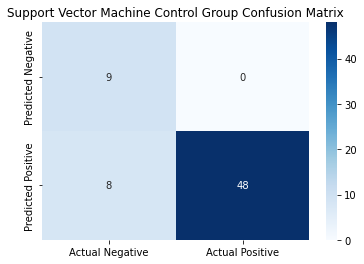

In [120]:
svcClassifier.fit(X_train, y_train.ravel())
svc_control_predictions = svcClassifier.predict(X_test)
print(f1_score(y_test, svc_control_predictions))

svc_confusion_matrix = confusion_matrix(svc_control_predictions, y_test, labels=svcClassifier.classes_)
ax=plt.axes()
ax.set_title("Support Vector Machine Control Group Confusion Matrix")
sb.heatmap(svc_confusion_matrix, cmap= 'Blues', annot=True, xticklabels=['Actual Negative', 'Actual Positive'], yticklabels=['Predicted Negative', 'Predicted Positive'], ax = ax)

ACTUAL TESTING

In [121]:
accuracy_rates_rf = []

LOOP

In [122]:
for i in range(len(X.columns)):
    rfClassifier.fit(X_train.iloc[:,[i]], y_train.ravel())
    rf_predictions2 = rfClassifier.predict(X_test.iloc[:, [i]])
    f1_score_i = f1_score(y_test, rf_predictions2)
    accuracy_rates_rf.append(f1_score_i)

In [123]:
accuracy_rates_svc = []

In [124]:
for i in range(len(X.columns)):
    svcClassifier.fit(X_train.iloc[:,[i]], y_train.ravel())
    svc_predictions2 = svcClassifier.predict(X_test.iloc[:, [i]])
    f1_score_i = f1_score(y_test, svc_predictions2)
    accuracy_rates_svc.append(f1_score_i)

PLOTTING RESULTS

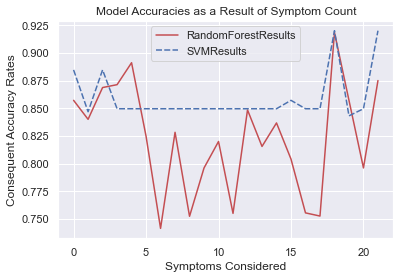

In [144]:
r = {"RandomForestResults": accuracy_rates_rf, "SVMResults": accuracy_rates_svc}
results = pd.DataFrame(r)
results.mul(100)
sb.lineplot(data = results, palette=['r', 'b'])
plt.xlabel("Symptoms Considered")
plt.ylabel("Consequent Accuracy Rates")
plt.title("Model Accuracies as a Result of Symptom Count")
plt.legend(loc = "upper center")

TABLE FORMAT

In [149]:
results

,RandomForestResults,SVMResults
0,0.857143,0.884615
1,0.840000,0.846847
2,0.868687,0.884615
3,0.871287,0.849558
4,0.891089,0.849558
5,0.824742,0.849558
6,0.741573,0.849558
7,0.828283,0.849558
8,0.752475,0.849558
9,0.796117,0.849558
